In [64]:
# Import libraries
import math
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [65]:
DATA_PATH = 'data/hardware/'

In this notebook, the data about hardware equipment for different mining algorithms is collected, cleaned and saved for later use

**STANDARD UNITS**
- hashing_power : h/s
- power : W
- efficiency : J/h


# SHA256

In [66]:
SHA256 = pd.read_csv(DATA_PATH + 'SHA256_mining_hardware.csv',parse_dates=['Date of release'])
# Rename columns
SHA256 = SHA256.rename(columns={'Miner_name': 'name', 'Date of release':'release_date', 'UNIX_date_of_release': 'UNIX_release_date',\
                       'Hashing power (Th/s)': 'hashing_power', 'Power (W)': 'power', 'Efficiency_J_Gh': 'consumption', 'Qty': 'qty'})
# Drop some columns
SHA256 = SHA256.dropna().reset_index(drop=True)
SHA256['release_date'] = SHA256['release_date'].apply(lambda x: datetime.strptime(x,'%m.%Y'))
SHA256

,name,release_date,UNIX_release_date,hashing_power,power,consumption,qty
0,Bitmain Antminer S3,2014-07-01,1.404173e+09,0.0,366,0.76569,20000.0
1,Bitmain Antminer S5,2014-12-01,1.417392e+09,1.0,590,0.51082,20000.0
2,Bitmain Antminer S7,2015-09-01,1.441066e+09,5.0,"1,293",0.27336,129610.0
3,Bitmain Antminer S9 (11.5Th),2016-06-01,1.464739e+09,12.0,"1,127",0.09800,1000.0
4,Bitmain Antminer S7-LN,2016-06-01,1.464739e+09,3.0,697,0.25815,129000.0
...,...,...,...,...,...,...,...
74,Canaan AvalonMiner 1047,2019-09-01,1.567296e+09,37.0,"2,380",0.06432,1000.0
75,Bitmain Antminer S17e,2019-11-01,1.572566e+09,64.0,"2,880",0.04500,1000.0
76,Bitmain Antminer T17e,2019-11-01,1.572566e+09,53.0,"2,915",0.05500,1000.0
77,Bitmain Antminer S17+,2019-12-01,1.575158e+09,73.0,"2,920",0.04000,1000.0


The units currently are

- hashing_power : Th/s
- power : W
- efficiency : J/Gh
- Qty: estimate of amount sold

Let us convert these to the standard units

In [67]:
# Convert to standard units
SHA256['hashing_power'] = SHA256['hashing_power']*10**12
SHA256['consumption'] = SHA256['consumption']/10**9

In [68]:
SHA256.to_csv(DATA_PATH+'SHA256_hardware_clean.csv')

# Ethash

In [69]:
ethash = pd.read_csv(DATA_PATH + 'Ethash_mining_hardware.csv',parse_dates=['Release date'], encoding='utf-8')
ethash = ethash.dropna().reset_index(drop=True).drop(columns=['Number','Type','Source','Accessed on', 'Manufacturer'])
ethash = ethash.rename(columns={'Product': 'name','Release date':'release_date','Hash rate in Mh/s': 'hashing_power', 'Power in W': 'power', 'Efficiency in Mh/J': 'efficiency'})

ethash[:4]

,release_date,name,hashing_power,power,efficiency
0,2012-03-19,Radeon HD 7870,10.0,175.0,0.06
1,2012-03-22,GeForce GTX 680,15.0,195.0,0.08
2,2012-08-16,GeForce GTX 660 Ti,12.0,150.0,0.08
3,2012-09-10,GeForce GTX 650 Ti,10.0,110.0,0.09


**units**

- hashing_power : Mh/s
- power : W
- efficiency : Mh/J

In [70]:
# Convert to standard units
ethash['hashing_power'] = ethash['hashing_power']*10**6
ethash['consumption'] = 1/(ethash['efficiency']*10**6)
ethash[:4]

,release_date,name,hashing_power,power,efficiency,consumption
0,2012-03-19,Radeon HD 7870,10000000.0,175.0,0.06,0.000017
1,2012-03-22,GeForce GTX 680,15000000.0,195.0,0.08,0.000013
2,2012-08-16,GeForce GTX 660 Ti,12000000.0,150.0,0.08,0.000013
3,2012-09-10,GeForce GTX 650 Ti,10000000.0,110.0,0.09,0.000011


In [71]:
ethash.to_csv(DATA_PATH+'ethash_hardware_clean.csv')

# Equihash
[data](https://en.wikibooks.org/wiki/ZCash_mining_GPU_Comparison#GPU_Miner_Comparison)

In [202]:
equihash = pd.read_csv(DATA_PATH+'equihash_mining_hardware.csv')
#equihash = equihash.drop(columns=['Core Clock', 'Intensity level', 'Mem Clock', 'Driver', 'info', 'OS', 'Submitted by'])
equihash = equihash.astype(str)
equihash = equihash.rename(columns={'Brand': 'brand', 'GPU':'name','Hash Rate': 'hashing_power', 'Watts': 'power', 'Efficiency': 'efficiency', 'Cost': 'cost'})
equihash

,brand,name,hashing_power,power,cost,efficiency
0,ASUS,GTX 1070 8GB Dual OC,460 Sol\s,115w,£379.99 UK,3.99 Sol\w
1,nan,nan,nan,nan,nan,nan
2,MSI,GTX 980ti 6GB Gaming,460 Sol\s,nan,£230 UK,2.27 Sol\w
3,nan,nan,nan,nan,nan,nan
4,Gigabyte,R7 260x 2GB,105 Sol\s,nan,£30 UK,nan
...,...,...,...,...,...,...
154,NVIDIA,Quadro K4200 8Gb,55,nan,nan,nan
155,NVIDIA,Quadro M4000 16Gb,150,nan,nan,nan
156,Sapphire,HD 7950 3G with Boost,300-305,nan,Used ~$90,nan
157,MSI,GTX 1050Ti,200,79W,ZAR3100,nan


In [203]:
for i in range(equihash.shape[0]):
    if equihash.loc[i]["brand"] == 'nan':
        equihash.loc[i]["brand"] = equihash.loc[i-1]["brand"]
    if equihash.loc[i]["name"] == 'nan':
        equihash.loc[i]["name"] = equihash.loc[i-1]["name"]

In [204]:
#Delete if efficiency is unkown AND (hash_rate or power) unknown, because then we can't calculate efficiency
equihash = equihash[~((equihash["efficiency"]=='nan') & ((equihash["hashing_power"]=='nan') | (equihash["power"]=='nan')))].reset_index(drop=True)
equihash

,brand,name,hashing_power,power,cost,efficiency
0,ASUS,GTX 1070 8GB Dual OC,460 Sol\s,115w,£379.99 UK,3.99 Sol\w
1,MSI,GTX 980ti 6GB Gaming,460 Sol\s,nan,£230 UK,2.27 Sol\w
2,Gigabyte,GTX 1050 2Gb,172,67.5,135 €,nan
3,Gigabyte,AORUS GeForce GTX 1080 Ti 11G,785,300,new 800$ with tax; Dec-2017,2.62 Sol/W
4,Gigabyte,GTX 1080 Ti Waterforce 11GD,730 Avg,225,nan,3.25 Sol/w
...,...,...,...,...,...,...
78,NVIDIA,Tesla M2050 3GB,152,225W,Used,nan
79,NVIDIA,Tesla V100 16Gb,963 sol/s,260,8000 for solo card.,nan
80,NVIDIA,Tesla M2070 6GB,165,225W,nan,nan
81,MSI,GTX 1050Ti,200,79W,ZAR3100,nan


In [205]:
equihash = equihash.set_index(['brand','name']).drop_duplicates().reset_index()

In [206]:
equihash['hashing_power'] = equihash['hashing_power'].str.strip('sSoOlL/\\aAvVgG')
equihash['efficiency'] = equihash['efficiency'].str.strip('sSoOlL/\\aAvVgGwW')
equihash['power'] = equihash['power'].str.strip('wW')
equihash

,brand,name,hashing_power,power,cost,efficiency
0,ASUS,GTX 1070 8GB Dual OC,460,115,£379.99 UK,3.99
1,MSI,GTX 980ti 6GB Gaming,460,nan,£230 UK,2.27
2,Gigabyte,GTX 1050 2Gb,172,67.5,135 €,nan
3,Gigabyte,AORUS GeForce GTX 1080 Ti 11G,785,300,new 800$ with tax; Dec-2017,2.62
4,Gigabyte,GTX 1080 Ti Waterforce 11GD,730,225,nan,3.25
...,...,...,...,...,...,...
77,NVIDIA,Tesla M2050 3GB,152,225,Used,nan
78,NVIDIA,Tesla V100 16Gb,963,260,8000 for solo card.,nan
79,NVIDIA,Tesla M2070 6GB,165,225,nan,nan
80,MSI,GTX 1050Ti,200,79,ZAR3100,nan


In [226]:
math.isnan(equihash.loc[2,"efficiency"])

True

In [207]:
def clean_avg(two_numbers):
    ''' 
    Sometimes hashing power is written as 500-510, returns avg of those two
    '''
    if '-' in two_numbers:
        return (int(two_numbers.split('-')[0])+int(two_numbers.split('-')[1]))/2
    return two_numbers

In [208]:
equihash['hashing_power'] = equihash['hashing_power'].apply(lambda x: clean_avg(x)).astype(int)
equihash['power'] = equihash['power'].astype(float)
equihash['efficiency'] = equihash['efficiency'].astype(float)

In [228]:
equihash['efficiency'] = equihash.apply(lambda x: x.hashing_power/x.power if math.isnan(x.efficiency) else x.efficiency,axis=1)
equihash['consumption'] = 1/equihash['efficiency']

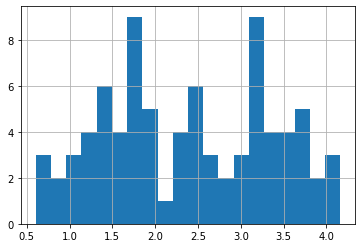

In [235]:
equihash['efficiency'].hist(bins=20)
plt.show()

In [236]:
equihash.to_csv(DATA_PATH+'equihash_hardware_clean.csv')

# Scrypt